# Karamoja Project Overview

Food insecurity is a major problem affecting most countries in Africa.There is no difference in Karamoja, a sub-region in Uganda.Factors leading to this is due to intense droughts, pests and diseases. This causes a decrease in the productivity of crops

## Problem Statement

NGOs providing technical support and farm inputs to farmers experiencing low crop yield, lack visibility into the overall state of the region.



Two main staple crops of the region(sorghum and maize) were used by Dalberg Data Insights to measure the yield in the area.

## Objectives
-To understand the ratio between the crop area to both sorghum and crop yield.


-To understand the relationship between total crop yield and population of each subcounty.

-To gain a visibility on the overall state of the region.



In [18]:
# Loading the zipped data and needed pandas library
import zipfile
import pandas as pd


#Unzipping the data
with zipfile.ZipFile('DATA.zip', 'r')as zip_ref:
     for file_info in zip_ref.infolist():
      filename= file_info.filename
      print(filename)

with zipfile.ZipFile('DATA.zip', 'r')as zip_ref:
  csv_files = [f for f in zip_ref.namelist() if f.endswith('.csv')]



#Processing each csv

with zipfile.ZipFile('DATA.zip', 'r')as zip_ref:
     for f in csv_files:
      with zip_ref.open(f) as file:
       df=pd.read_csv(file, encoding='latin-1')
#Getting to understand more of each csv file
print(f"content of {f}")
print(df.head())
print(df.tail)
print(df.describe())
print(df.info())

DATA/
DATA/TABLES/
DATA/TABLES/Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv
__MACOSX/
__MACOSX/DATA/
__MACOSX/DATA/TABLES/
__MACOSX/DATA/TABLES/._Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv
DATA/TABLES/Uganda_Karamoja_District_Crop_Yield_Population.csv
__MACOSX/DATA/TABLES/._Uganda_Karamoja_District_Crop_Yield_Population.csv
__MACOSX/DATA/._TABLES
DATA/.DS_Store
__MACOSX/DATA/._.DS_Store
DATA/SHAPEFILES/
DATA/SHAPEFILES/Crop_Type_Map_Sorghum.prj
__MACOSX/DATA/SHAPEFILES/
__MACOSX/DATA/SHAPEFILES/._Crop_Type_Map_Sorghum.prj
DATA/SHAPEFILES/Crop_Type_Map_Maize.prj
__MACOSX/DATA/SHAPEFILES/._Crop_Type_Map_Maize.prj
DATA/SHAPEFILES/Uganda_Districts.dbf
__MACOSX/DATA/SHAPEFILES/._Uganda_Districts.dbf
DATA/SHAPEFILES/Uganda_Subcounties.dbf
__MACOSX/DATA/SHAPEFILES/._Uganda_Subcounties.dbf
DATA/SHAPEFILES/Crop_Type_Map_Sorghum.qpj
__MACOSX/DATA/SHAPEFILES/._Crop_Type_Map_Sorghum.qpj
DATA/SHAPEFILES/Crop_Type_Map_Maize.qpj
__MACOSX/DATA/SHAPEFILES/._Crop_Type_Map_Maize.qpj
DATA/

In [19]:
#Checking for missing values
with zipfile.ZipFile('DATA.zip', 'r')as zip_ref:
     for f in csv_files:
          with zip_ref.open(f)as file:
            df=pd.read_csv(file, encoding='latin-1')
            print(df.isnull().sum()) #sum of all nan values
            print(df.isnull().sum(axis=0))# sum of all nan values by column



OBJECTID          0
SUBCOUNTY_NAME    0
DISTRICT_NAME     0
POP               0
Area              0
Karamoja          0
S_Yield_Ha        0
M_Yield_Ha        0
Crop_Area_Ha      0
S_Area_Ha         0
M_Area_Ha         0
S_Prod_Tot        0
M_Prod_Tot        0
dtype: int64
OBJECTID          0
SUBCOUNTY_NAME    0
DISTRICT_NAME     0
POP               0
Area              0
Karamoja          0
S_Yield_Ha        0
M_Yield_Ha        0
Crop_Area_Ha      0
S_Area_Ha         0
M_Area_Ha         0
S_Prod_Tot        0
M_Prod_Tot        0
dtype: int64
Unnamed: 0    0
dtype: int64
Unnamed: 0    0
dtype: int64
OBJECTID        0
NAME            0
POP             0
Area            0
S_Yield_Ha      0
M_Yield_Ha      0
Crop_Area_Ha    0
S_Area_Ha       0
M_Area_Ha       0
S_Prod_Tot      0
M_Prod_Tot      0
dtype: int64
OBJECTID        0
NAME            0
POP             0
Area            0
S_Yield_Ha      0
M_Yield_Ha      0
Crop_Area_Ha    0
S_Area_Ha       0
M_Area_Ha       0
S_Prod_Tot      0
M_Pro

There are no Nan or missing values.Hence, the data that end with .csv is ready for analysis

In [23]:
#Accesing other file types
with zipfile.ZipFile('DATA.zip', 'r')as zip_ref:
  FilePath= 'DATA/SHAPEFILES/Crop_Type_Map_Sorghum.prj'
  with zip_ref.open(FilePath, 'r') as Sorghum:
   print(Sorghum.read())

b'PROJCS["WGS_1984_UTM_Zone_36N",GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.017453292519943295]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",33],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["Meter",1]]'


The csv files are then extracted manually from the zipped file for further analysis of the data at hand.

# Data Analysis



In [2]:
#reading the excel file with info according to district
import pandas as pd
df = pd.read_excel('Uganda_Karamoja_District_Crop_Yield_Population.xlsx',engine='openpyxl')
df.head()

,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468


In [ ]:
print(df.shape)  #checking the number of rows and columns
print(df.columns) #checking the names of each column
df.duplicated().sum() #checking for duplicated data

(7, 11)
Index(['OBJECTID', 'NAME', 'POP', 'Area', 'S_Yield_Ha', 'M_Yield_Ha',
       'Crop_Area_Ha', 'S_Area_Ha', 'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'],
      dtype='object')


0

The file containing information about the agricultural productivity of districts within the Karamoja region has 11 columns and 7 rows.The column names are: OBJECTID,NAME, POP, Area, S_Yield_Ha, M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot respectively. The file has neither duplicated nor null values

In [3]:
subcounty_yield = pd.read_excel('Uganda_Karamoja_Subcounty_Crop_Yield_population.xlsx', engine='openpyxl')
subcounty_yield.head()

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400


In [6]:
print(subcounty_yield.shape) #checking for rows and columns
print(subcounty_yield.columns) #checking the column names
subcounty_yield.duplicated().sum() #checking for duplicated values

(52, 13)
Index(['OBJECTID', 'SUBCOUNTY_NAME', 'DISTRICT_NAME', 'POP', 'Area',
       'Karamoja', 'S_Yield_Ha', 'M_Yield_Ha', 'Crop_Area_Ha', 'S_Area_Ha',
       'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'],
      dtype='object')


0

The file containing information about the agricultural productivity of subcounty within the Karamoja region has 11 columns and 7 rows.The column names are: OBJECTID,SUBCOUNTY_NAME, DISTRICT_NAME,POP, Area, Karamoja,S_Yield_Ha, M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot respectively. The file has neither duplicated nor null values.

# Data Vizualization

In [4]:
#loading the needed libraries for data visualiztion
import matplotlib.pyplot as plt
import seaborn as sns

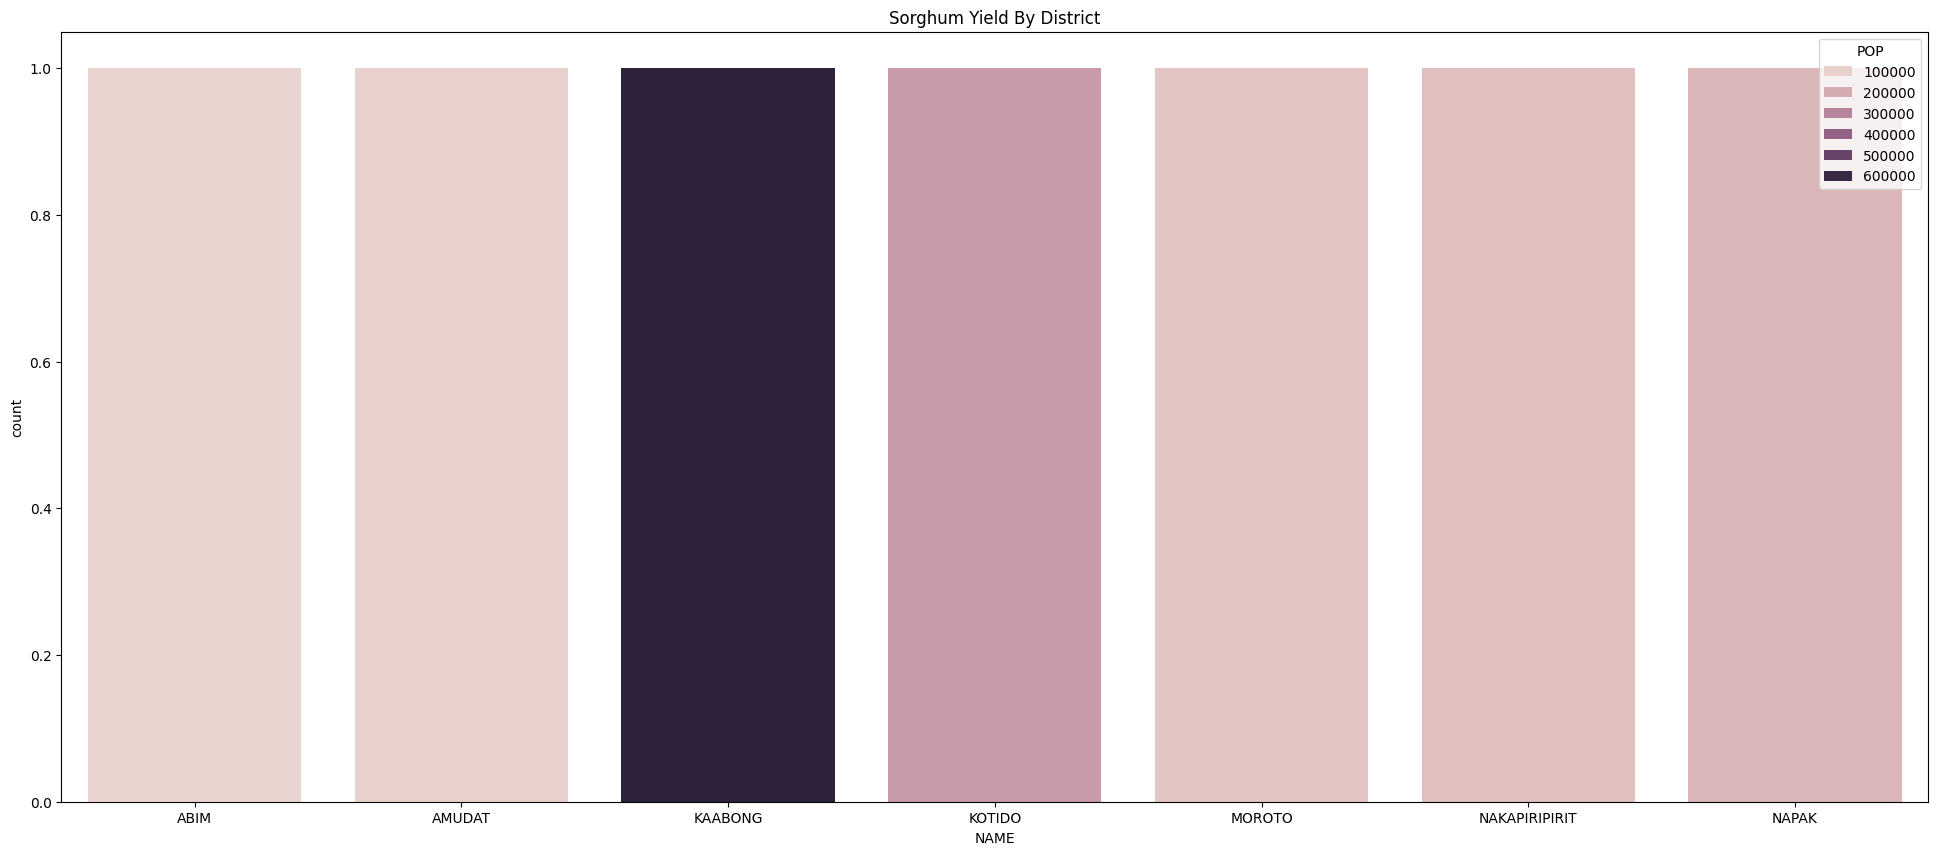

In [5]:
#what district has the highest population
#Using a histogram to determine that
plt.figure(figsize=(53,10))
plt.subplot(1,2,1)
sns.countplot(x= 'NAME', data=df, hue= 'POP').set_title('Population of each District')
plt.show()

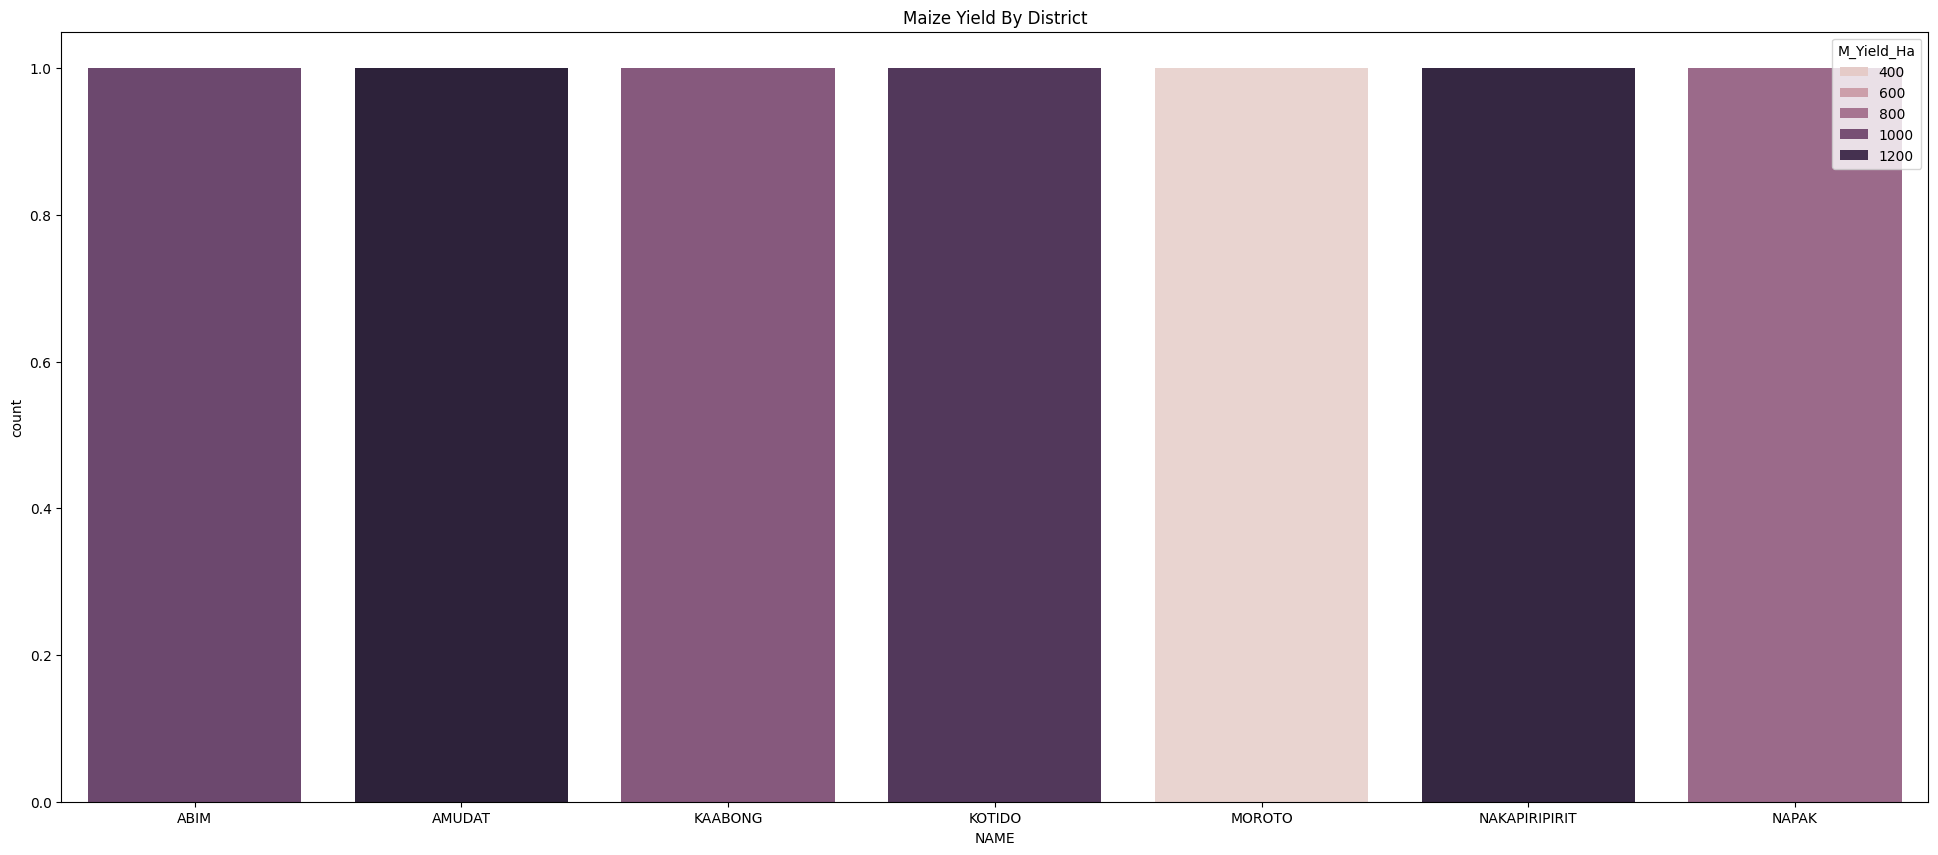

In [6]:
#How much maize does each district yield?
plt.figure(figsize=(53,10))
plt.subplot(1,2,1)
sns.countplot(x= 'NAME', data=df, hue= 'M_Yield_Ha').set_title('Maize Yield By District')
plt.show()

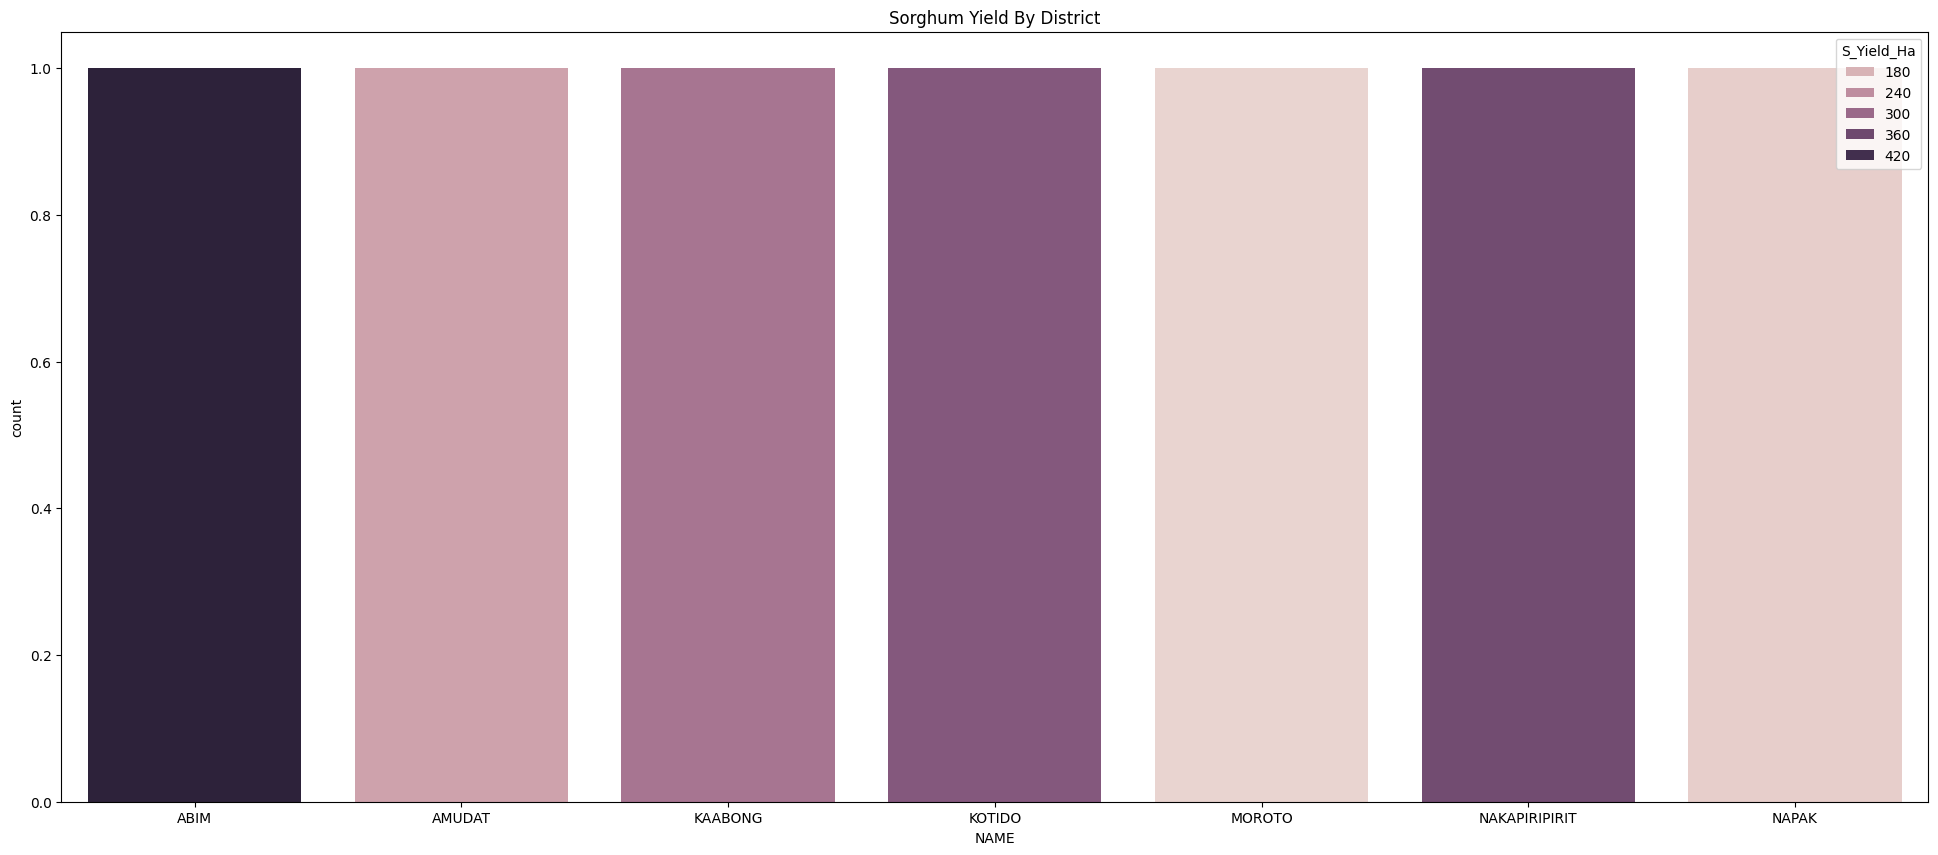

In [7]:
#How much sorghum does each district yield
plt.figure(figsize=(53,10))
plt.subplot(1,2,1)
sns.countplot(x= 'NAME', data=df, hue= 'S_Yield_Ha').set_title('Sorghum Yield By District')
plt.show()

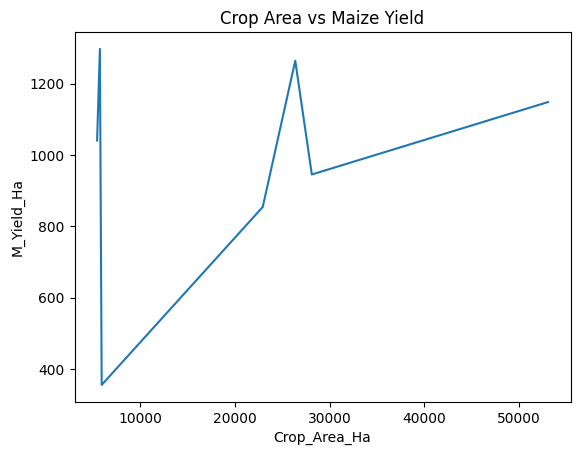

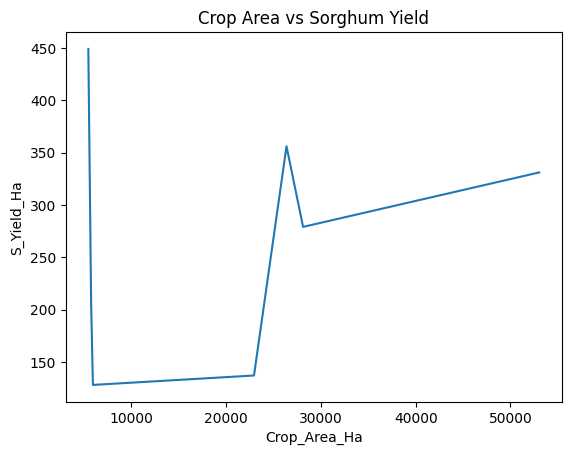

In [10]:
#How much crop area does each crop cover
sns.lineplot(x='Crop_Area_Ha', y='M_Yield_Ha', data=df)
plt.title('Crop Area vs Maize Yield')
plt.show()
sns.lineplot(x='Crop_Area_Ha', y='S_Yield_Ha', data=df)
plt.title('Crop Area vs Sorghum Yield')
plt.show()


# Conclusion
Kaabong district has the highest population of 627,057 people and is the third in maize and sorghum yield.
Amudat is the highest in maize yield while Abim is the highest in sorghum yield. The yield of both sorghum and maize is lower than their crop yield.Therefore, population growth and lack of proper crop development are some of the major causes of food insecurity in the area.

# Recommendations
 - The farmers to be provided with genetically modified seeds and pesticides to curb destruction caused by pests and diseases to better the quality of harvest.

 -Production of Water Resourvoirs for continous water supply for the crop's development countering intense droughts to increase crop yield.

 -Acquiring a soil scientist to determine the appropriate soil nutrients for a balanced area to yield ratio.